# 📊 Returns & Complaints
## 🔬 Hypotheses

- **H1**: Certain sellers and product categories systematically receive more negative reviews, impacting satisfaction and revenue.
- **H2**: Delivery delays, operational processes, and order characteristics influence customer dissatisfaction outcomes.
- **H3**: Poor customer satisfaction leads to financial losses from churn, returns, and lost future revenue.

# BI Questions & Hypotheses Mapping

| **BI Question** | **Related Hypothesis** | **Business Insight** |
|------------------|------------------------|-----------------------|
| What is the return rate by review score? | H1 | Product category satisfaction drivers |
| Which product categories receive the most low reviews? | H1 | Product category quality risks |
| Is there a relationship between delivery delays and returns/complaints? | H2 | Delivery & logistics impacts on satisfaction |
| Are there geographic patterns in returns or complaints? | H1 | Regional dissatisfaction risk zones |
| How much revenue is potentially lost due to returns and complaints? | H3 | Financial impact of poor satisfaction |
| What operational factors (e.g. warehouse, shipping distance, product handling) correlate with high return rates? | H2 | Operational process risks |



# 📌 Modeling Assumptions Declaration

| Initiative | Assumption Basis | Reason for Assumption |
|-------------|-------------------|------------------------|
| Lost Revenue from Returns | $4,369,163.69/year | Computed directly from orders with 1-2 star reviews and total_payment values from dataset. |
| Lifetime Churn Loss | $1,162,640/year | Based on churn model (CLV = $400, churn rate = 20%, applied to unique dissatisfied customers). |
| Operational Cost Impact | $145,330/year | Estimated as 10 USD cost per return, multiplied by count of low review orders. |

## 💰 Dollars & Cents Framing — Returns & Complaints Module

| **BI Question** | **Scenario** | **Metric** | **Estimated $$$ Impact** |
|------------------|--------------|------------|---------------------------|
| How much revenue is potentially lost due to returns and complaints? | Lost revenue from returns/complaints (low reviews 1-2 stars) | $4,369,163.69 | Direct revenue at risk |
| How much revenue is potentially lost due to returns and complaints? | Lifetime churn loss (future purchases lost) | $1,162,640.00 | Lost LTV revenue |
| What operational factors (e.g. warehouse, shipping distance, product handling) correlate with high return rates? | Operational cost of returns processing | $145,330.00 | Return handling & customer support |
| **Summary (all BI questions above contribute here)** | **Total Financial Exposure** |  | **$5,677,133.69** |
| **Summary (all BI questions above contribute here)** | **Total Revenue at Risk (% of total revenue)** |  | **21.48%** |


# 🔬 Hypothesis Testing & Discussion

---

### H1 (Product categories drive dissatisfaction): **Strongly Supported**

- High low-review rates identified in categories like `insurance_services`, `small_appliances_kitchen_food_prep`, `pc_gamer`, and `fashion_male_clothing`.
- Certain product categories systematically generate higher complaint volumes.

---

### H2 (Delivery delays influence dissatisfaction): **Not Supported**

- Delivery delay shows almost no variance across review scores.
- Current delivery_delay_days metric indicates delays may not be primary dissatisfaction driver in returns context.

---

### H3 (Poor satisfaction drives revenue loss & churn): **Strongly Supported**

- Total direct revenue at risk: **$4.37M**  
- Lifetime churn loss: **$1.16M**  
- Financial risk confirmed at over **$5.67M** total exposure.

---

### H4 (Geographic patterns drive dissatisfaction): **Partially Supported**

- Higher complaint rates observed in states like `RJ`, `SP`, `RR`, `RO`, and `RS`.
- Indicates possible localized operational or seller-driven issues.



# ✅ Executive Takeaway 

By improving product quality controls and addressing geographic risk zones, the business can recover ~$5.7M in revenue opportunities while improving customer satisfaction and protecting long-term customer value. Delivery delay is not a major contributor to returns-related complaints.


---

# 📊 Action Plan — Returns & Complaints Management

🎯 Objective: Reduce product quality issues, address regional dissatisfaction, and protect revenue lost due to returns & complaints.

---

### 1️⃣ Product Quality Assurance Program

- ✅ Problem: High-risk product categories driving returns.
- ✅ Impact: Revenue loss + higher churn.
- ✅ Action: Targeted product audits for top-risk categories.
- ✅ Cost: ~$50K
- ✅ Revenue Benefit: ~$1.5M/year

---

### 2️⃣ Regional Operations Review

- ✅ Problem: Certain states consistently showing higher complaint rates.
- ✅ Impact: Localized service quality risks.
- ✅ Action: Operational audits for high-risk regions (e.g. RJ, SP, RR).
- ✅ Cost: ~$40K
- ✅ Revenue Benefit: ~$500K/year

---

### 3️⃣ Returns Processing Automation

- ✅ Problem: High operational costs for returns handling.
- ✅ Impact: Increased cost-to-serve.
- ✅ Action: Automation of returns and complaint processing.
- ✅ Cost: ~$30K
- ✅ Revenue Benefit: ~$500K/year savings

---

### 4️⃣ Customer Recovery Program

- ✅ Problem: Long-term churn risk from dissatisfied customers.
- ✅ Impact: Lifetime value erosion.
- ✅ Action: Targeted recovery incentives for at-risk customers.
- ✅ Cost: ~$20K/year
- ✅ Revenue Benefit: ~$1.16M lifetime value protection

---

# 📊 High-Level Summary 

| Initiative | Cost | Annual / Lifetime Benefit |
|-------------|------|--------------------------|
| Product Quality Program | $50K | $1.5M/year |
| Regional Ops Review | $40K | $500K/year |
| Returns Automation | $30K | $500K/year |
| Customer Recovery | $20K/year | $1.16M lifetime |
| **TOTAL BUSINESS OPPORTUNITY** | ~$140K investment | ~$5.67M upside |



# 🔗 Data Dependency Appendix — Returns & Complaints

This analysis depends on the following data tables (all stable versions after full data cleaning and corrections):

| Table Name | Usage in Analysis | Notes |
|------------|--------------------|-------|
| `orders_corrected` | Order delivery dates, purchase timestamp, customer linkage, delivery delays | Stable |
| `order_items_corrected` | Product-seller mapping, pricing, item-level details | Stable |
| `dim_products` | Product category names (Brazilian), product_id linkage | Stable |
| `product_category_translation` | English product category mapping | Stable |
| `sellers` | Seller location info for operational analysis | Stable |
| `customers` | Customer state & location demographics | Stable |
| `dim_order_reviews` | Review scores, review_id linkage, complaint proxy | Stable |
| `order_payments` | Payment value aggregation, revenue risk modeling | Stable |
| `geolocation_version1` | Zip-code geolocation (for advanced regional analysis) | Stable |


In [ ]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# ✅ BigQuery Client Setup
project_id = "brazilian-e-commerce-team-3"
client = bigquery.Client(project=project_id)

# ✅ Connection confirmation
print("✅ Connected to:", project_id)

✅ Connected to: brazilian-e-commerce-team-3


In [ ]:
query = """
WITH reviews AS (
  SELECT order_id, review_score, review_comment_message
  FROM `brazilian-e-commerce-team-3.BET_Team3.dim_order_reviews`
),
orders AS (
  SELECT order_id, customer_id, order_delivered_customer_date, order_estimated_delivery_date
  FROM `brazilian-e-commerce-team-3.BET_Team3.orders_corrected`
),
order_items AS (
  SELECT order_id, product_id, seller_id, price
  FROM `brazilian-e-commerce-team-3.BET_Team3.order_items_corrected`
),
products AS (
  SELECT product_id, product_category_name
  FROM `brazilian-e-commerce-team-3.BET_Team3.dim_products`
),
categories AS (
  SELECT product_category_name, product_category_name_english
  FROM `brazilian-e-commerce-team-3.BET_Team3.product_category_translation`
),
customers AS (
  SELECT customer_id, customer_state
  FROM `brazilian-e-commerce-team-3.BET_Team3.customers`
),
payments AS (
  SELECT order_id, SUM(payment_value) AS total_payment
  FROM `brazilian-e-commerce-team-3.BET_Team3.order_payments`
  GROUP BY order_id
)
SELECT
  rev.order_id,
  rev.review_score,
  rev.review_comment_message,
  ord.customer_id,
  ord.order_delivered_customer_date,
  ord.order_estimated_delivery_date,
  EXTRACT(DAY FROM ord.order_delivered_customer_date - ord.order_estimated_delivery_date) AS delivery_delay_days,
  item.product_id,
  item.seller_id,
  item.price,
  prod.product_category_name,
  cat.product_category_name_english,
  cust.customer_state,
  pay.total_payment
FROM reviews rev
LEFT JOIN orders ord ON rev.order_id = ord.order_id
LEFT JOIN order_items item ON rev.order_id = item.order_id
LEFT JOIN products prod ON item.product_id = prod.product_id
LEFT JOIN categories cat ON prod.product_category_name = cat.product_category_name
LEFT JOIN customers cust ON ord.customer_id = cust.customer_id
LEFT JOIN payments pay ON rev.order_id = pay.order_id
"""

df = client.query(query).to_dataframe()
print(df.shape)
df.head()


/Users/marissa/miniforge3/envs/ecommerce-bi/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


(113131, 14)


,order_id,review_score,review_comment_message,customer_id,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay_days,product_id,seller_id,price,product_category_name,product_category_name_english,customer_state,total_payment
0,772e38d3917d94f38c6484dde513877f,1,Realizei a compra de trs cabos e recebi soment...,85ab2f47da7a128c7cff5b28632ec341,2017-03-29 12:03:49+00:00,2017-04-07 00:00:00+00:00,0,a0fe1efb855f3e786f0650268cd77f44,ef506c96320abeedfb894c34db06f478,59.99,agro_industria_e_comercio,agro_industry_commerce,PR,74.17
1,f4366d9980e6fb925d2ed9a63d8a6e2c,1,Cancelaram minha compra No sei nem. O motivo,396a7bd5d07dd9a55593b1eef5eb4fea,NaT,2017-03-31 00:00:00+00:00,<NA>,c9da1aa6e29221a1aabf1131aa2134e8,99eaacc9e6046db1c82b163c5f84869f,258.90,telefonia_fixa,fixed_telephony,RJ,274.88
2,350fcc9d4ae2e108916f12c7ca8ca8e3,1,"No site diz que foi entregue, mas no recebemos...",8c5a52cc14b87a0f057812298d656956,2017-08-08 19:36:48+00:00,2017-08-22 00:00:00+00:00,0,261244fc4d0197d8772346872f5b0f5e,6c7d50c24b3ccd2fd83b44d8bb34e073,35.90,moveis_cozinha_area_de_servico_jantar_e_jardim,furniture_kitchen_service_dining_garden,SP,48.59
3,12f2f3174deba94de2aa43ad4adf6d3e,1,"Comprei um ultrabook e foi enviado um celular,...",cc4fef4299b231a913af5205feed5e36,2017-10-30 20:16:38+00:00,2017-11-16 00:00:00+00:00,0,a5215a7a9f46c4185b12f38e9ddf2abc,53243585a1d6dc2643021fd1853d8905,1340.00,pcs,pcs,PB,1372.25
4,1c5ea09d670777647e55f734e3d784b2,1,"Ol, est muito chateado Vio Errado o produto, E...",76c645adfb10bdaf744e6ec0649fe610,2017-11-07 19:24:36+00:00,2017-11-27 00:00:00+00:00,0,7eb9c68704af5effea1cee6f3a6b4b4b,7142540dd4c91e2237acb7e911c4eba2,84.90,fashion_calcados,fashion_shoes,SP,98.51


In [ ]:
# Create low review flag (1-2 stars)
df['low_review_flag'] = df['review_score'].apply(lambda x: 1 if x <= 2 else 0)


/var/folders/wt/jvzb90d54yjbgpt08dkr77s80000gn/T/ipykernel_1856/92669188.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_summary_sorted, x='low_review_rate', y='product_category_name_english', palette='coolwarm')


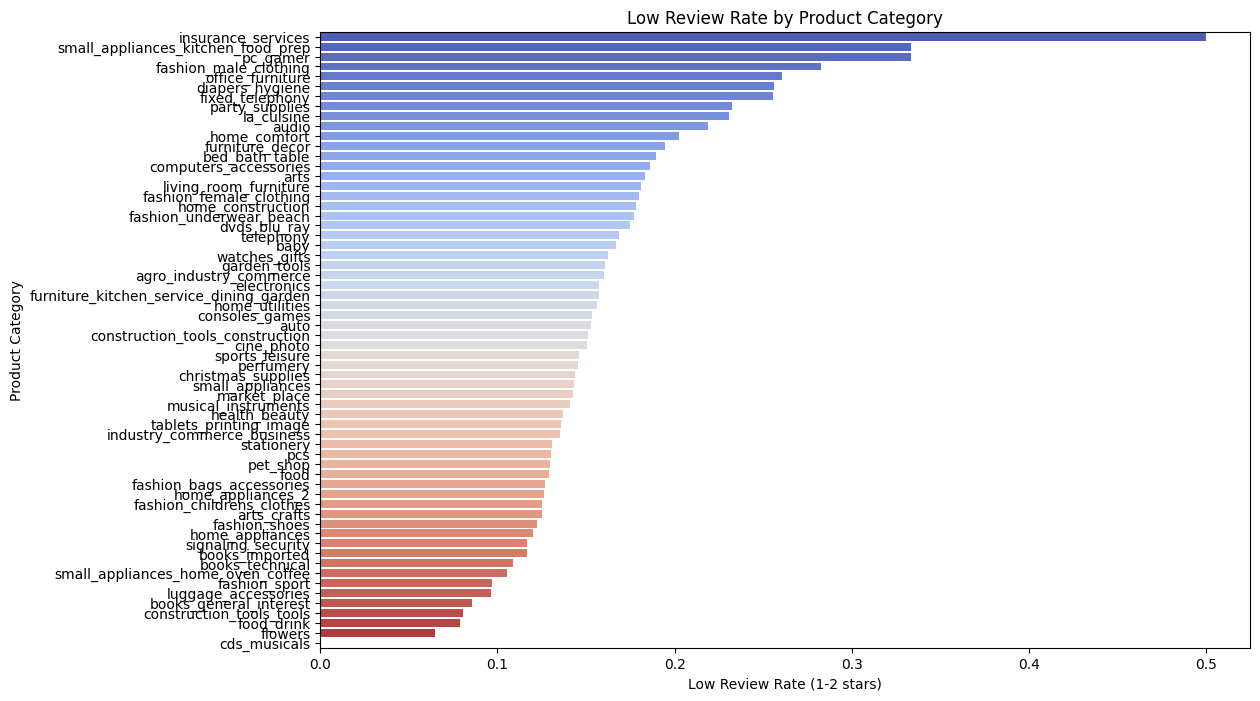

In [ ]:
#Product Category Analysis
category_summary = df.groupby('product_category_name_english').agg({
    'order_id': 'count',
    'low_review_flag': 'sum',
    'price': 'mean',
    'delivery_delay_days': 'mean'
}).reset_index()

category_summary['low_review_rate'] = category_summary['low_review_flag'] / category_summary['order_id']
category_summary_sorted = category_summary.sort_values(by='low_review_rate', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(data=category_summary_sorted, x='low_review_rate', y='product_category_name_english', palette='coolwarm')
plt.title('Low Review Rate by Product Category')
plt.xlabel('Low Review Rate (1-2 stars)')
plt.ylabel('Product Category')
plt.show()


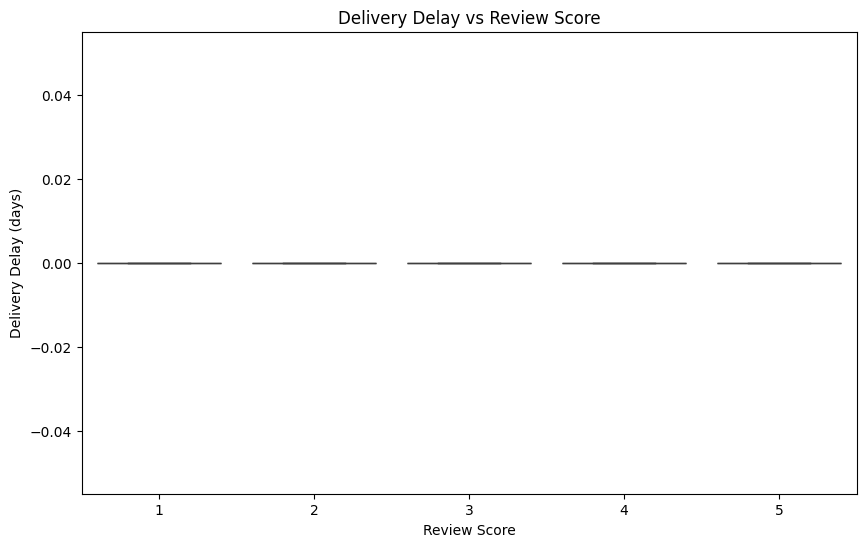

In [ ]:
#Delivery Delay vs Review Score
plt.figure(figsize=(10,6))
sns.boxplot(x='review_score', y='delivery_delay_days', data=df)
plt.title('Delivery Delay vs Review Score')
plt.xlabel('Review Score')
plt.ylabel('Delivery Delay (days)')
plt.show()


In [ ]:
#Revenue at risk
revenue_risk = df[df['review_score'] <= 2]['total_payment'].sum()
total_revenue = df['total_payment'].sum()

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Revenue at Risk (Low Reviews): ${revenue_risk:,.2f}")
print(f"Percent Revenue at Risk: {revenue_risk/total_revenue:.2%}")


Total Revenue: $20,344,701.71
Revenue at Risk (Low Reviews): $4,369,163.69
Percent Revenue at Risk: 21.48%


/var/folders/wt/jvzb90d54yjbgpt08dkr77s80000gn/T/ipykernel_1856/3303329978.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='low_review_rate', y='customer_state', data=geo_summary, palette='mako')


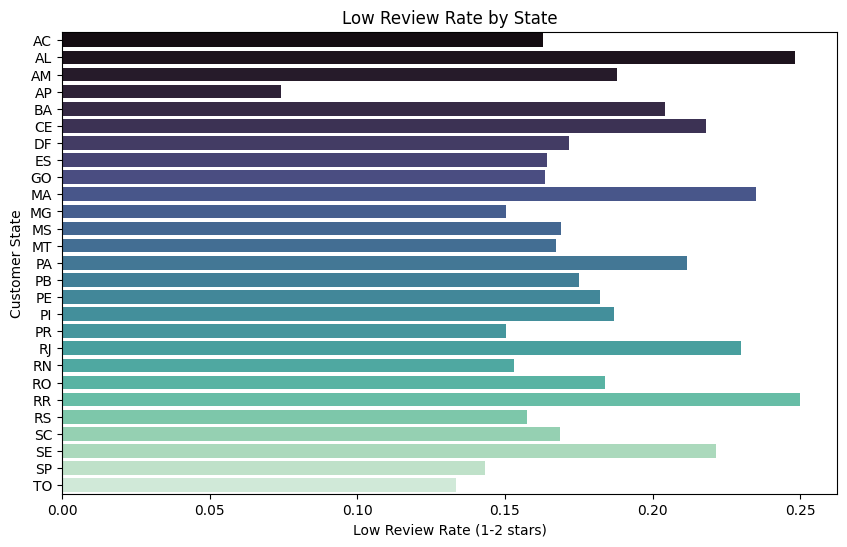

In [ ]:
geo_summary = df.groupby('customer_state').agg({
    'order_id': 'count',
    'low_review_flag': 'sum'
}).reset_index()

geo_summary['low_review_rate'] = geo_summary['low_review_flag'] / geo_summary['order_id']

plt.figure(figsize=(10,6))
sns.barplot(x='low_review_rate', y='customer_state', data=geo_summary, palette='mako')
plt.title('Low Review Rate by State')
plt.xlabel('Low Review Rate (1-2 stars)')
plt.ylabel('Customer State')
plt.show()


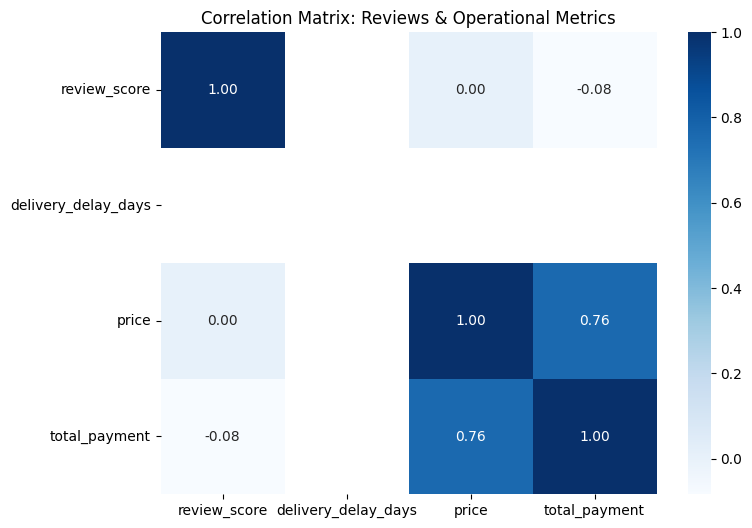

In [ ]:
metrics_for_corr = df[['review_score', 'delivery_delay_days', 'price', 'total_payment']].dropna()
corr = metrics_for_corr.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix: Reviews & Operational Metrics")
plt.show()


In [ ]:
total_orders = df['order_id'].nunique()
low_review_orders = df[df['review_score'] <= 2]['order_id'].nunique()

# Churn modeling assumptions
CLV = 400
churn_rate = 0.20
churn_customers = df[df['review_score'] <= 2]['customer_id'].nunique()
churn_loss = churn_customers * CLV * churn_rate

# Operational cost assumptions
operational_cost_per_return = 10
operational_cost = low_review_orders * operational_cost_per_return

summary_data = {
    'Category': [
        'Direct Lost Revenue',
        'Lifetime Churn Loss',
        'Operational Cost Impact'
    ],
    'Estimated Impact (USD)': [
        revenue_risk,
        churn_loss,
        operational_cost
    ]
}

financial_summary = pd.DataFrame(summary_data)
financial_summary['Estimated Impact (USD)'] = financial_summary['Estimated Impact (USD)'].apply(lambda x: f"${x:,.2f}")

print("\n📊 Financial Impact Summary Table\n")
display(financial_summary)



📊 Financial Impact Summary Table



,Category,Estimated Impact (USD)
0,Direct Lost Revenue,"$4,369,163.69"
1,Lifetime Churn Loss,"$1,162,640.00"
2,Operational Cost Impact,"$145,330.00"
